In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/epl-player-shooting-stats-23-24-premier-league/player_shooting_2023_2024.csv')
df.head()

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Birth Month
0,0,1,Max Aarons,ENG,DF,Bournemouth,24.0,2000.0,12.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,Matches,May
1,1,2,Bénie Adama Traore,CIV,"FW,MF",Sheffield Utd,21.0,2002.0,4.3,0.0,...,0.0,0.0,0.0,0.3,0.3,0.27,-0.3,-0.3,Matches,April
2,2,3,Tyler Adams,USA,MF,Bournemouth,25.0,1999.0,1.2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Matches,July
3,3,4,Tosin Adarabioyo,ENG,DF,Fulham,26.0,1997.0,16.0,2.0,...,0.0,0.0,0.0,0.7,0.7,0.05,1.3,1.3,Matches,February
4,4,5,Elijah Adebayo,ENG,FW,Luton Town,26.0,1998.0,12.9,9.0,...,0.0,0.0,0.0,5.6,5.6,0.20,3.4,3.4,Matches,June


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
df.describe()

,Unnamed: 0,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
count,584.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,457.000000,562.000000,562.000000,...,395.000000,457.000000,562.000000,562.000000,562.000000,562.000000,562.000000,457.000000,562.000000,562.000000
mean,291.500000,25.770463,1997.519573,12.224555,1.734875,15.044484,5.088968,31.132166,1.399875,0.432242,...,0.294810,16.587309,0.412811,0.142349,0.158363,1.748577,1.622954,0.101510,-0.013701,-0.030427
std,168.730554,4.360614,4.364883,9.444622,2.969691,18.596374,7.175611,20.309767,2.056370,0.617645,...,0.274362,4.858932,1.465119,0.660325,0.715135,2.766119,2.448454,0.073324,1.089624,1.068367
min,0.000000,17.000000,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,-5.900000,-6.100000
25%,145.750000,22.000000,1994.000000,3.500000,0.000000,2.000000,0.000000,20.000000,0.322500,0.000000,...,0.000000,12.700000,0.000000,0.000000,0.000000,0.100000,0.100000,0.050000,-0.400000,-0.400000
50%,291.500000,26.000000,1998.000000,11.300000,0.000000,8.000000,2.000000,30.800000,0.925000,0.230000,...,0.280000,16.400000,0.000000,0.000000,0.000000,0.700000,0.700000,0.090000,0.000000,-0.100000
75%,437.250000,29.000000,2001.000000,19.800000,2.000000,22.000000,7.000000,41.200000,2.007500,0.667500,...,0.430000,19.900000,0.000000,0.000000,0.000000,2.100000,2.100000,0.130000,0.200000,0.200000
max,583.000000,39.000000,2007.000000,32.000000,19.000000,99.000000,42.000000,100.000000,30.000000,7.500000,...,1.000000,32.900000,13.000000,8.000000,8.000000,21.800000,18.700000,0.960000,5.700000,5.500000


In [5]:
from sklearn.preprocessing import LabelEncoder

positions = df['Pos']

label_encoder = LabelEncoder()

encoded_positions = label_encoder.fit_transform(positions)

df['Pos'] = encoded_positions

In [6]:
df.head()

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Birth Month
0,0,1,Max Aarons,ENG,0,Bournemouth,24.0,2000.0,12.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,Matches,May
1,1,2,Bénie Adama Traore,CIV,5,Sheffield Utd,21.0,2002.0,4.3,0.0,...,0.0,0.0,0.0,0.3,0.3,0.27,-0.3,-0.3,Matches,April
2,2,3,Tyler Adams,USA,7,Bournemouth,25.0,1999.0,1.2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Matches,July
3,3,4,Tosin Adarabioyo,ENG,0,Fulham,26.0,1997.0,16.0,2.0,...,0.0,0.0,0.0,0.7,0.7,0.05,1.3,1.3,Matches,February
4,4,5,Elijah Adebayo,ENG,3,Luton Town,26.0,1998.0,12.9,9.0,...,0.0,0.0,0.0,5.6,5.6,0.20,3.4,3.4,Matches,June


Column Descriptions:

Rk: Index of the player in the list.
1. Player: Name of the player.
2. Nation: Nationality of the player.
3. Pos: Position of the player on the field.
4. Squad: Team the player belongs to.
5. Age: Age of the player at the time of Aug 1st 2023(season start).
6. Born: Birth year of the player.
7. 90s: Number of 90-minute intervals the player participated in.
8. Gls: Total goals scored by the player.
9. Sh: Total shots taken by the player.
10. SoT: Shots on target by the player.
11. SoT%: Shot accuracy percentage.
12. Sh/90: Shots per 90 minutes.
13. SoT/90: Shots on target per 90 minutes.
14. G/Sh: Goals per shot.
15. G/SoT: Goals per shot on target.
16. Dist: Average distance of shots taken by the player.
17. FK: Free kicks taken by the player.
18. PK: Penalty kicks made by the player.
19. PKatt: Penalty kick attempts by the player.
20. xG: Expected goals.
21. npxG: Non-penalty expected goals.
22. npxG/Sh: Non-penalty expected goals per shot.
23. G-xG: Difference between actual goals and expected goals.
24. np:G-xG: Difference between non-penalty actual goals and non-penalty expected goals.
25. Matches: Link to matches played as a str.

In [7]:
df.isnull().sum()

Unnamed: 0       0
Rk               0
Player           0
Nation           0
Pos              0
Squad            0
Age             22
Born            22
90s             22
Gls             22
Sh              22
SoT             22
SoT%           127
Sh/90           22
SoT/90          22
G/Sh           127
G/SoT          189
Dist           127
FK              22
PK              22
PKatt           22
xG              22
npxG            22
npxG/Sh        127
G-xG            22
np:G-xG         22
Matches          0
Birth Month     22
dtype: int64

In [8]:
c_features = df.select_dtypes(include=['object']).columns.tolist()

In [9]:
for feature in c_features:
    most_frequent_value = df[feature].mode()[0]
    df[feature] = df[feature].fillna(most_frequent_value)

In [10]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
for feature in numerical_features:
    mean_value = df[feature].mean()
    df[feature] = df[feature].fillna(mean_value)

In [11]:
df.isnull().sum()

Unnamed: 0     0
Rk             0
Player         0
Nation         0
Pos            0
Squad          0
Age            0
Born           0
90s            0
Gls            0
Sh             0
SoT            0
SoT%           0
Sh/90          0
SoT/90         0
G/Sh           0
G/SoT          0
Dist           0
FK             0
PK             0
PKatt          0
xG             0
npxG           0
npxG/Sh        0
G-xG           0
np:G-xG        0
Matches        0
Birth Month    0
dtype: int64

In [12]:
# features

In [13]:
player_info=df.groupby('Player').agg({
    'Nation': 'first',
    'Pos': 'first',
    'Squad': 'first',
    'Age': 'first',
    'Gls': 'sum'  # Total goals scored by the player
})

In [14]:
top_player_info=player_info.sort_values(by='Gls', ascending=False)
top_player_info.head(10)

,Nation,Pos,Squad,Age,Gls
Player,,,,,
Player,N,10,Squad,25.770463,38.16726
Erling Haaland,NOR,3,Manchester City,23.000000,19.00000
Ollie Watkins,ENG,3,Aston Villa,28.000000,18.00000
Mohamed Salah,EGY,3,Liverpool,31.000000,17.00000
Cole Palmer,ENG,7,Manchester City,21.000000,16.00000
Dominic Solanke,ENG,3,Bournemouth,26.000000,16.00000
Jarrod Bowen,ENG,3,West Ham,27.000000,15.00000
Son Heung-min,KOR,3,Tottenham,31.000000,15.00000
Alexander Isak,SWE,3,Newcastle Utd,24.000000,15.00000


In [15]:
features = ['Pos', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'xG', 'G-xG']
X = df[features]
y = df['G/Sh']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [18]:
predictions = decision_tree.predict(X_test)
print(predictions)
# for i in range(len(X_test)):
#   print(f"Predicted G/Sh: {predictions[i]:.2f}, Actual G/Sh: {X_test.iloc[i]['actual_G_Sh']:.2f}")

[0.         0.1        0.         0.17       0.14       0.
 0.08960613 0.08960613 0.08       0.         0.08960613 0.1
 0.08960613 0.08960613 0.         0.06       0.1        0.2
 0.         0.09       0.         0.09       0.         0.08960613
 0.17       0.         0.08       0.08960613 0.08960613 0.14
 0.18       0.08960613 0.08960613 0.         0.08960613 0.08960613
 0.1        0.         0.14       0.         0.         0.
 0.08       0.         0.         0.17       0.12       0.08960613
 0.11       0.08       0.08       0.         0.08960613 0.
 0.08960613 0.1        0.08960613 0.07       0.         0.08960613
 0.1        0.         0.09       0.         0.02       0.
 0.08960613 0.08960613 1.         0.2        0.08960613 0.
 0.3        0.         0.         0.21       0.22       0.1
 0.08       0.         0.08960613 0.         0.36       0.13
 0.         0.06       0.11       0.1        0.         0.13
 0.2        0.         0.06       0.         0.06       0.18
 0.12       0

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error is :", mse)

Mean Squared Error is : 0.009826745794706378


In [20]:
# Feature importances
feature_importances = decision_tree.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.00474665 0.08833345 0.10494114 0.06446265 0.33148232 0.00472401
 0.05135458 0.01047691 0.3394783 ]


In [21]:
# hyperparamerter tuning
tuned_decision_tree = DecisionTreeRegressor(max_depth=5, random_state=1)
tuned_decision_tree.fit(X_train, y_train)
tuned_predictions = tuned_decision_tree.predict(X_test)
tuned_mse = mean_squared_error(y_test, tuned_predictions)
print("Tuned Mean Squared Error:", tuned_mse)

Tuned Mean Squared Error: 0.0016995469574469376


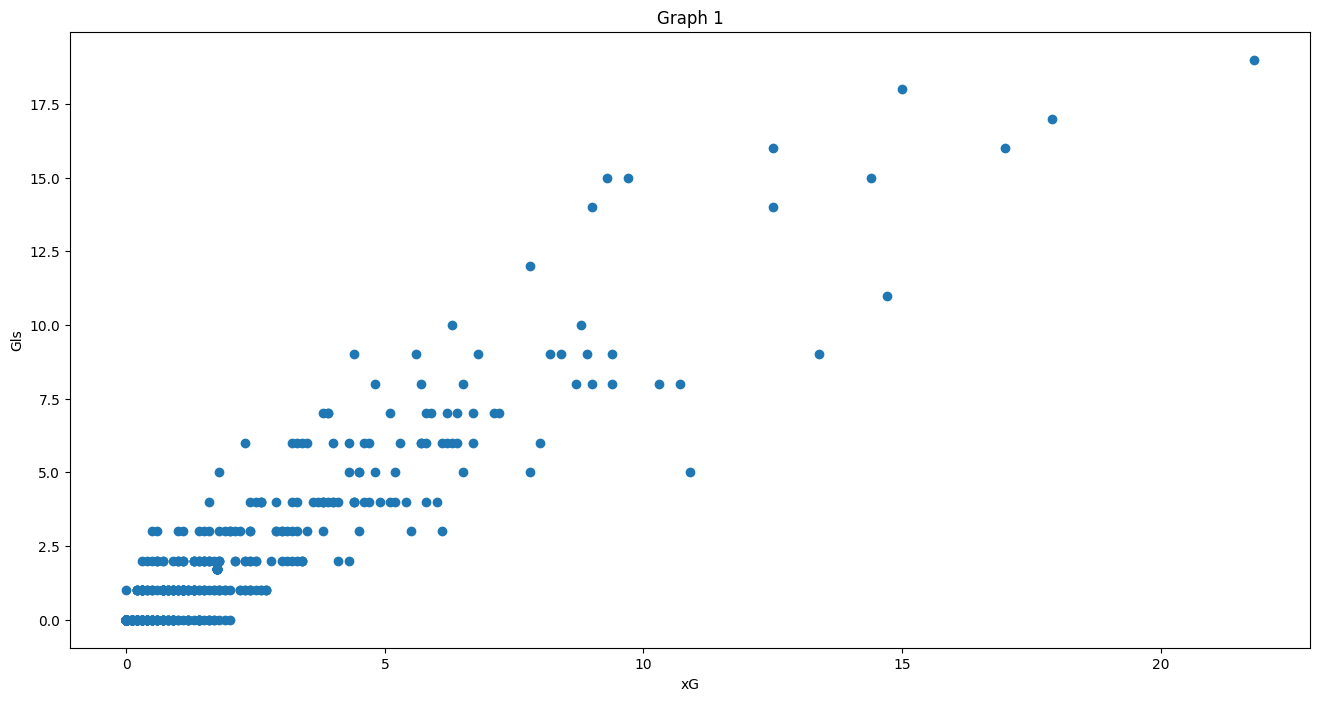

In [22]:
plt.figure(figsize=(16,8))
plt.title('Graph 1')
plt.xlabel('xG')
plt.ylabel('Gls')
plt.scatter(df['xG'], df['Gls'])
plt.show()

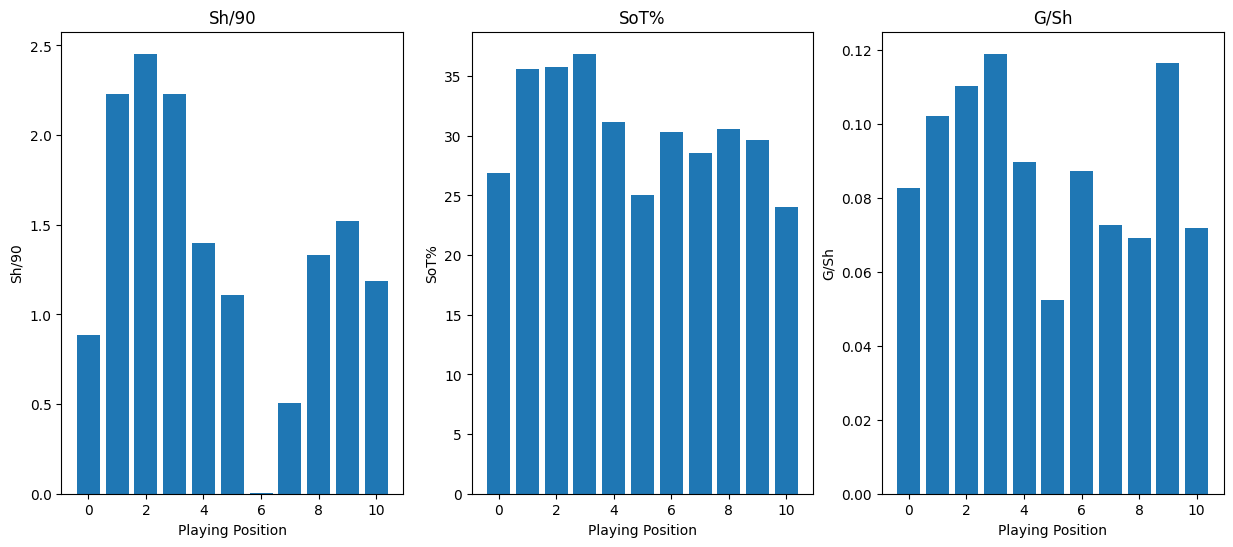

In [23]:
positions = df['Pos'].unique()
metrics = ['Sh/90', 'SoT%', 'G/Sh']

fig, axs = plt.subplots(1, len(metrics), figsize=(15, 6))

for i, metric in enumerate(metrics):
  avg_values = df.groupby('Pos')[metric].mean()
  axs[i].bar(positions, avg_values)
  axs[i].set_title(metric)
  axs[i].set_xlabel('Playing Position')
  axs[i].set_ylabel(metric)

# plt.tight_layout()
plt.show()

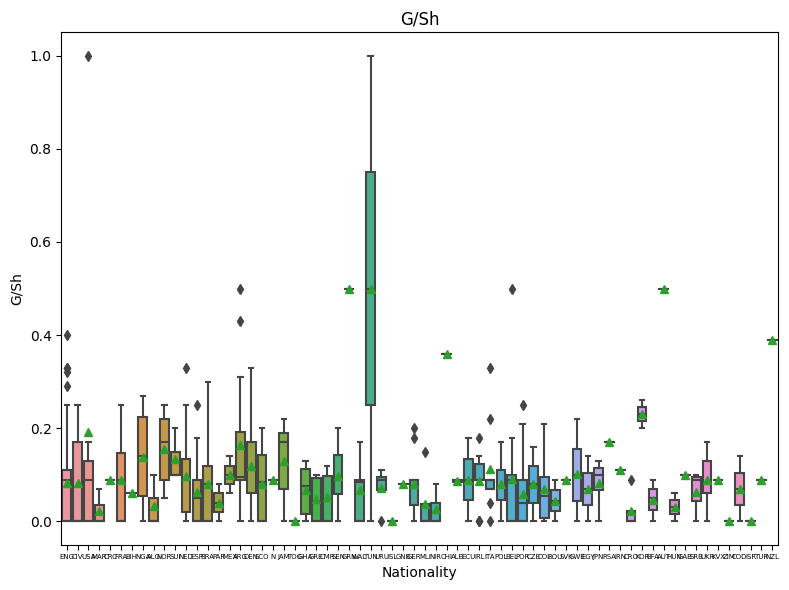

In [24]:
import seaborn as sns  # Using seaborn for boxplots

metric = 'G/Sh'  # Choose the shooting metric for comparison

# Create a figure for the subplot
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed

# Create the boxplot
sns.boxplot(
    x = "Nation",
    y = metric,
    showmeans=True,
    data=df,
    ax=ax
)
plt.xticks(fontsize=5)
ax.set_title(metric)
ax.set_xlabel('Nationality')
ax.set_ylabel(metric)

plt.tight_layout()
plt.show()